<h1> What to do when the data DataFest gives you isn't enough? </h1>

<h2> Find more data </h2>

Fight with annoying datasets
---------------------------------------------

    1. delimiters!
    2. character encodings!
    3. 200 year old website users (self-reported) :(
<script>
interested in learning more about how to markdown cells?: http://daringfireball.net/projects/markdown/syntax
</script>

Test interesting new hypotheses
-----------------------------------------------------
    
    1. what are some vague areas you want to look into?
    2. what datasets exist that might provide grounds for you to test hypotheses?
    3. what questions do your datasets suggest to you?

    * responses to the above:
        * Books!
        * http://www2.informatik.uni-freiburg.de/~cziegler/BX/
        * exploration!

<img src="http://imgs.xkcd.com/comics/python.png">

In [1]:
! conda info -e

# conda environments:
#
py3k                  *  /Users/thomasj/anaconda/envs/py3k
root                     /Users/thomasj/anaconda



In [71]:
import os
os.listdir('.')

['.git',
 '.ipynb_checkpoints',
 'BX-Book-Ratings.csv',
 'BX-Books.csv',
 'BX-Users.csv',
 'README.md',
 'Untitled.ipynb']

In [3]:
import pandas as pd

/Users/thomasj/anaconda/envs/py3k/lib/python3.4/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


<h3> Note: New datasets don't always load easily with the tools we used on the baseball dataset. With some configuration changes, they may though.</h3>

### pd.read_csv

In [9]:
books = pd.read_csv('BX-Books.csv')

CParserError: Error tokenizing data. C error: Expected 1 fields in line 55, saw 2


<h3> Question: what's a 'Traceback' i.e., stacktrace? </h3>

In [10]:
%debug

> /Users/thomasj/Downloads/BX-CSV-Dump/datafest/pandas/parser.pyx(1833)pandas.parser.raise_parser_error (pandas/parser.c:22649)()

ipdb> u
> /Users/thomasj/anaconda/envs/py3k/lib/python3.4/site-packages/pandas/io/parsers.py(1222)read()
   1221             else:
-> 1222                 raise
   1223 

ipdb> l
   1217                 return _get_empty_meta(self.orig_names,
   1218                                        self.index_col,
   1219                                        self.index_names,
   1220                                        dtype=self.kwds.get('dtype'))
   1221             else:
-> 1222                 raise
   1223 
   1224         # Done with first read, next time raise StopIteration
   1225         self._first_chunk = False
   1226 
   1227         if self.as_recarray:

ipdb> u
> /Users/thomasj/anaconda/envs/py3k/lib/python3.4/site-packages/pandas/io/parsers.py(763)read()
    762 
--> 763         ret = self._engine.read(nrows)
    764 

ipdb> nros
*** NameError: n

<h3> Note. we can use the information from the stacktrace to infer and fix the root issues in our processes. </h3>

In [70]:
with open('BX-Books.csv', 'rb') as f:
    i=0
    for l in f.readlines():
        print (l)
        if i==3:
            break
        i+=1

b'"ISBN";"Book-Title";"Book-Author";"Year-Of-Publication";"Publisher";"Image-URL-S";"Image-URL-M";"Image-URL-L"\r\n'
b'"0195153448";"Classical Mythology";"Mark P. O. Morford";"2002";"Oxford University Press";"http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg";"http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg";"http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg"\r\n'
b'"0002005018";"Clara Callan";"Richard Bruce Wright";"2001";"HarperFlamingo Canada";"http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg";"http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg";"http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg"\r\n'
b'"0060973129";"Decision in Normandy";"Carlo D\'Este";"1991";"HarperPerennial";"http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg";"http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg";"http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg"\r\n'


<h3> Note. adding the correct separator gets us farther, but we still can't load data.

In [14]:
books = pd.read_csv('BX-Books.csv', sep=';')

CParserError: Error tokenizing data. C error: Expected 8 fields in line 6452, saw 9


### Question. How impacted will our analyses be if we just throw out the lines we can't read?

In [55]:
bad_lines = []

with open('BX-Books.csv', 'r') as f:
    print (f.readline())
    for l in f.readlines():
        if len(l.split(";")) > 8:
            bad_lines.append(l)

"ISBN";"Book-Title";"Book-Author";"Year-Of-Publication";"Publisher";"Image-URL-S";"Image-URL-M";"Image-URL-L"



UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 1239: invalid continuation byte

###Note. We need to tell python what kind of characters are in our file.

In [74]:
bad_lines = []

with open('BX-Books.csv', 'r', encoding='ISO-8859-1') as f:
    print (f.readline())
    for l in f.readlines():
        if len(l.split(";")) > 8:
            bad_lines.append(l)

"ISBN";"Book-Title";"Book-Author";"Year-Of-Publication";"Publisher";"Image-URL-S";"Image-URL-M";"Image-URL-L"



In [75]:
len(bad_lines)

21367

In [76]:
bad_lines[0:1]

['"0393045218";"The Mummies of Urumchi";"E. J. W. Barber";"1999";"W. W. Norton &amp; Company";"http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg";"http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg";"http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg"\n']

<h3> Question. How many records are there total in my dataset?

In [77]:
with open('BX-Books.csv', 'r', encoding='ISO-8859-1') as f:
    total_records = len(f.readlines()) - 1 

In [78]:
float(len(bad_lines))/total_records

0.07873490579595326

### Note. if you really wanted to fix this problem, you would probably just use unix command line tools:
>LC_CTYPE=C && LANG=C && sed 's/\&amp;/\&/g' BX-Books.csv > BX-Books_no_semi_colon.txt

<h3> Note. Okay. Let's just sacrifice some records.</h3>

In [82]:
books = pd.read_csv('BX-Books.csv', sep=';', encoding='ISO-8859-1', error_bad_lines=False)

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/Users/thomasj/anaconda/envs/py3k/lib/python3.4/site-packages/IPython/core

In [87]:
books = pd.read_csv('BX-Books.csv', sep=';', encoding='ISO-8859-1', error_bad_lines=False)
demo = pd.read_csv('BX-Users.csv', sep=';', encoding='ISO-8859-1')
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', encoding='ISO-8859-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/Users/thomasj/anaconda/envs/py3k/lib/python3.4/site-packages/IPython/core



<img src="http://imgs.xkcd.com/comics/perl_problems.png ">

<h2> On to the analytical questions ...

<h3> So, now that it's loaded, what's actually in this books dataset? What questions does it suggest?

In [89]:
books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


<h3> What's in the demo table?

In [69]:
demo.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


<h3> What's in the rating table?

In [70]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


<h2> ... two possible questions ...
<h2>
Do people of different ages read books published in different years?
<p>
Do people of different ages rank the same book differently?

<h3>
Question. What does the age distribution look like?

In [22]:
desc=demo.describe()

In [23]:
desc

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [24]:
demo.describe??

In [74]:
demo.describe([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
10%,27886.70000,19.000000
20%,55772.40000,23.000000
30%,83658.10000,26.000000
40%,111543.80000,29.000000
50%,139429.50000,32.000000
60%,167315.20000,36.000000


In [161]:
%matplotlib inline
from matplotlib import pyplot as plt

def plot_age(df, col='Age'):
    """Makes a nice quartiles plot.
    
    Parameters
    ----------
    df : pandas.DataFrame
    col : str
        column that you want to plot quartiles for
    
    Returns
    -------
    matplotlib.axes
        plot object
    """
    plt.figure(figsize=(30,30)) # make a nice and large figure
    desc=df.describe() # get the data frame description
    ax = df[col].dropna().hist(bins=30)
    plt.vlines(desc.loc['25%'][col],0,45000, linewidth=5)
    plt.vlines(desc.loc['50%'][col],0,45000, linewidth=5)
    plt.vlines(desc.loc['75%'][col],0,45000, linewidth=5)
    
    return ax


<h3> What does a histogram of ages look like?

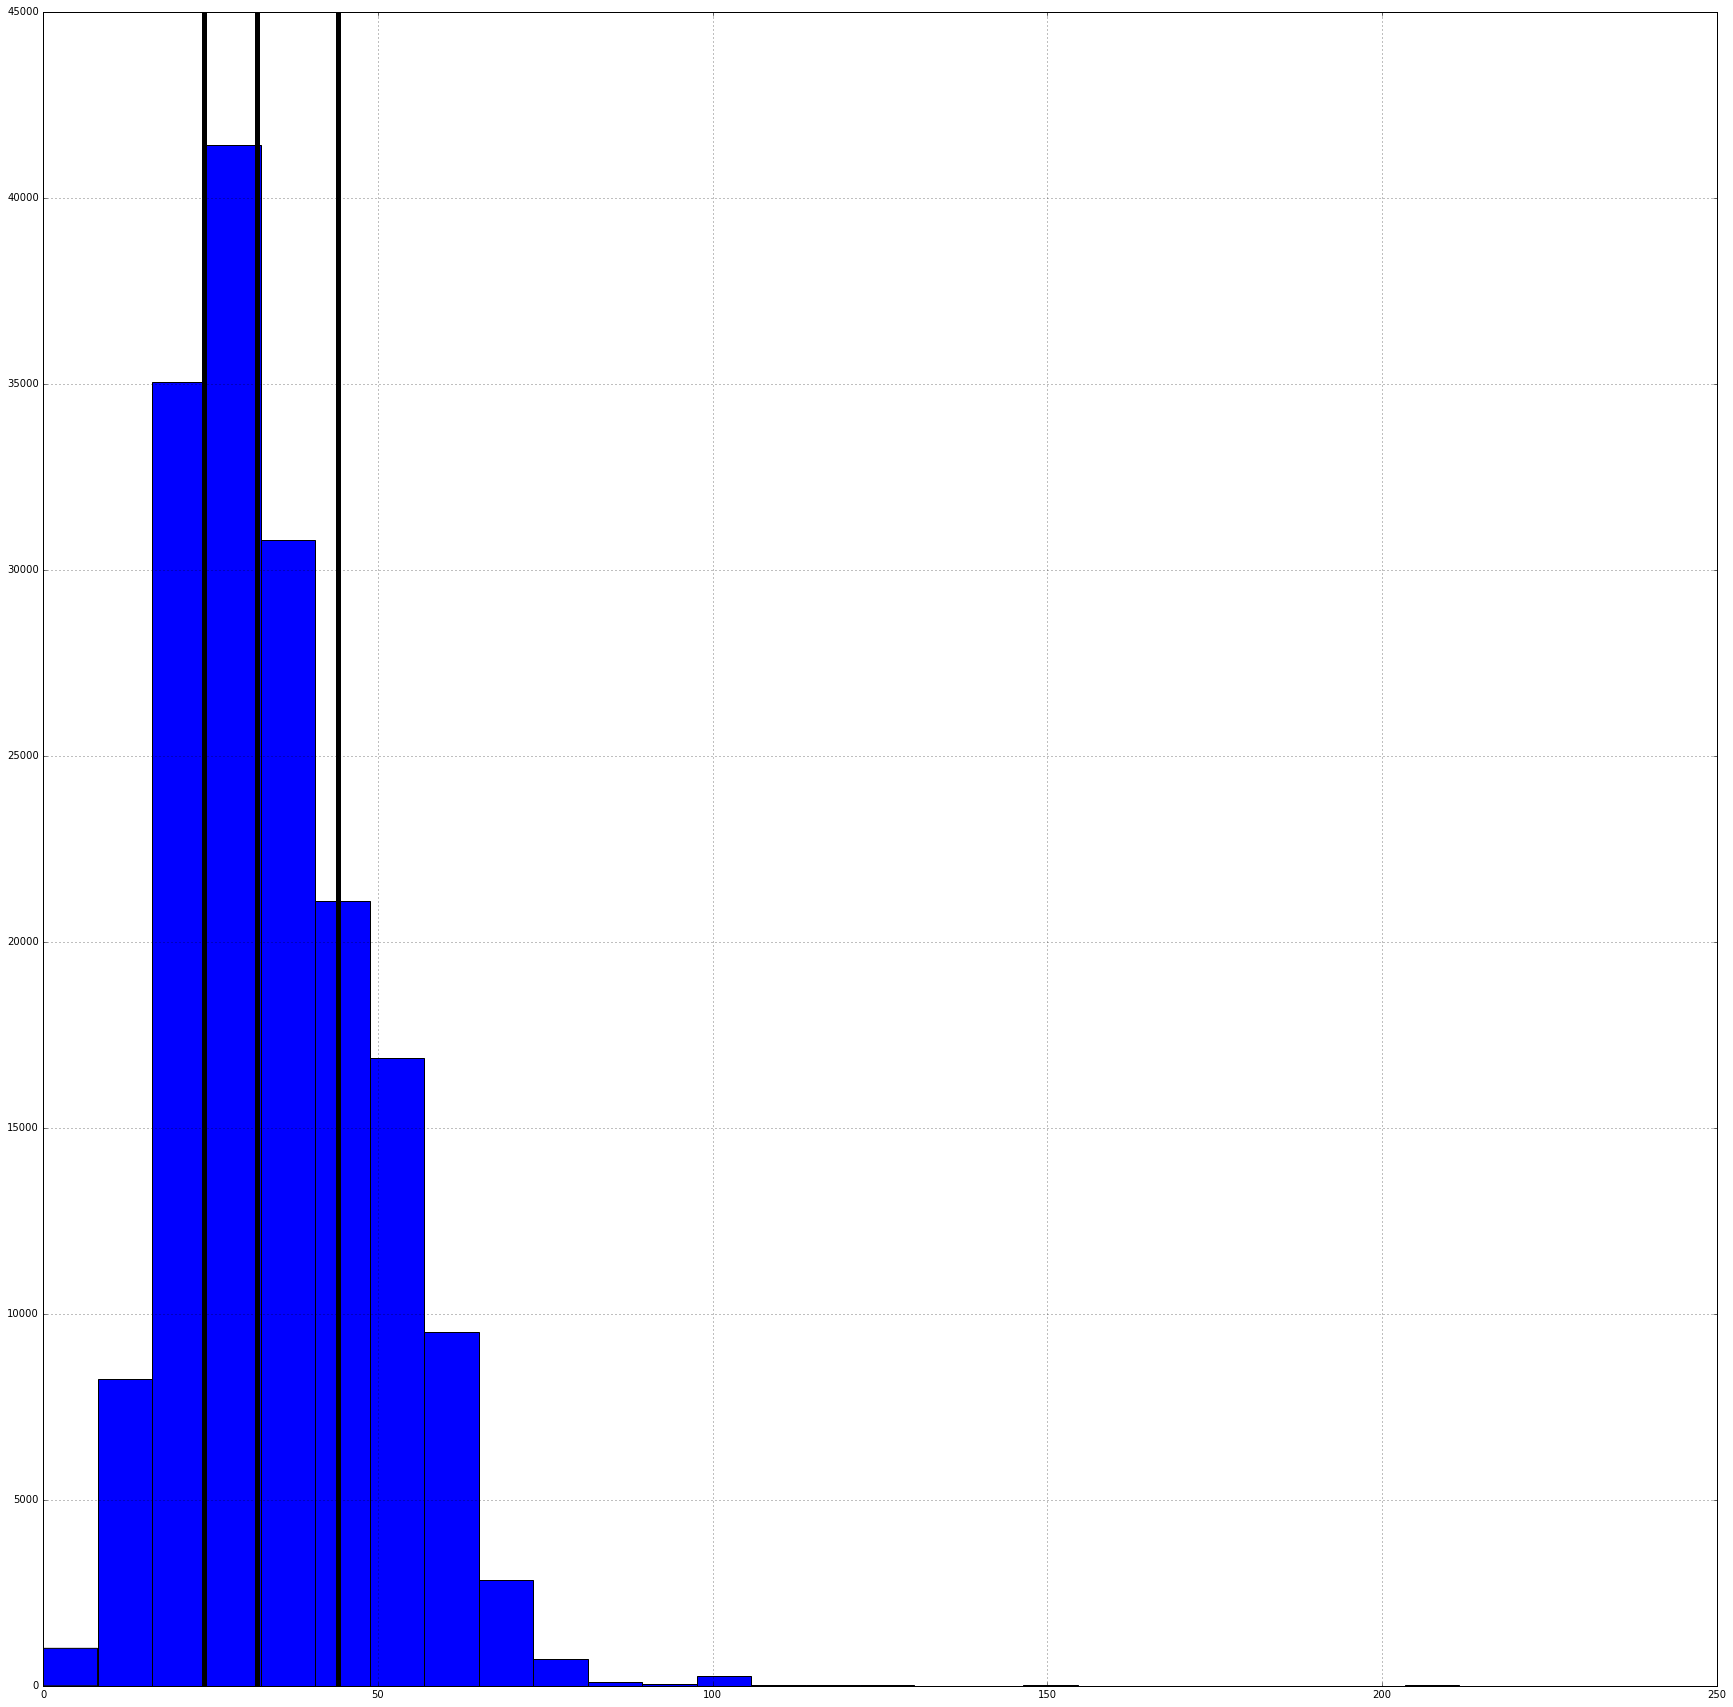

In [162]:
plot_age(demo)

<h3> Note. Filter out unreasonable data

In [27]:
demo2 = demo[demo.Age>10][demo.Age<100]

/Users/thomasj/anaconda/envs/py3k/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


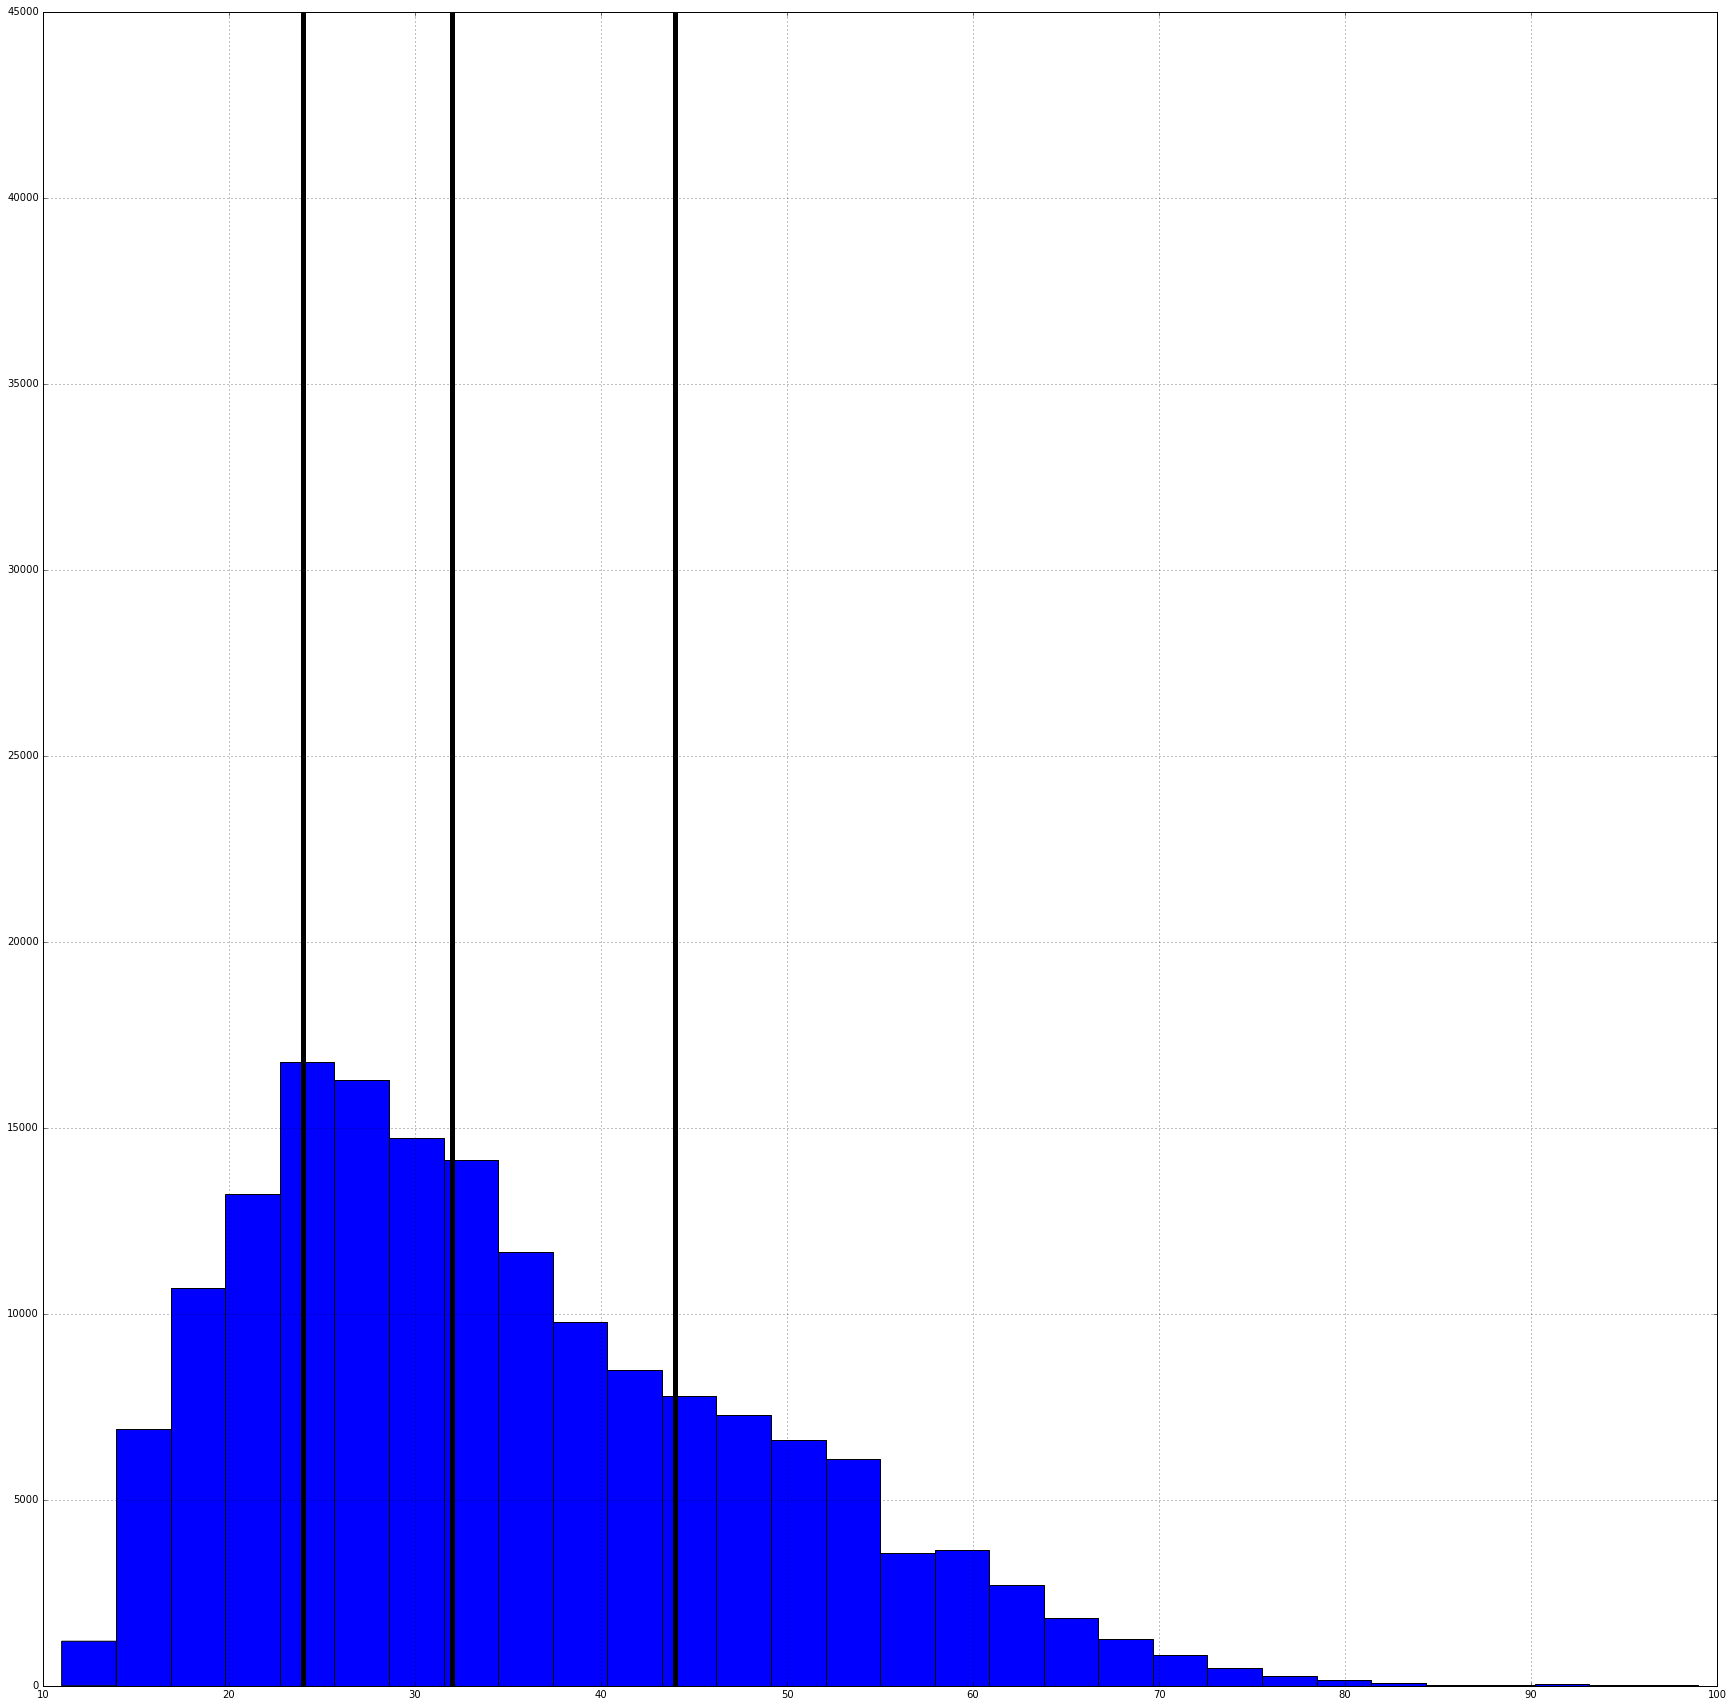

In [28]:
plot_age(demo2)

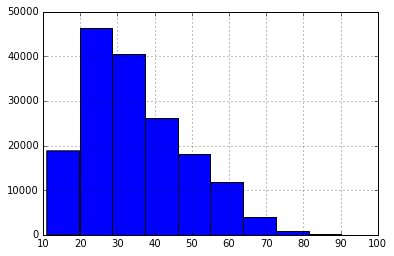

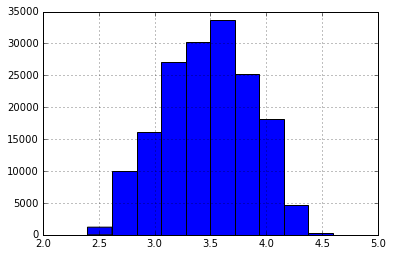

In [29]:
import numpy as np

demo2.Age.hist(bins=10)

plt.figure()

demo2.Age.apply(lambda x : np.log(x)).hist(bins=10)

<h3> Note. We need to merge our datasets to be able to ask the question "do people of different ages read books published in different years?" </h3>

<h3> Question. What are the common keys?</h3>

In [30]:
demo2.head()

,User-ID,Location,Age
1,2,"stockton, california, usa",18.0
3,4,"porto, v.n.gaia, portugal",17.0
5,6,"santa monica, california, usa",61.0
9,10,"albacete, wisconsin, spain",26.0
10,11,"melbourne, victoria, australia",14.0


In [31]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [32]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


<h3> Note: specify merge key for the pandas dataframe

In [97]:
df = demo2.merge(ratings, 
                 left_on='User-ID', 
                 right_on='User-ID')

all_dat = df.merge(books, 
                   left_on='ISBN', 
                   right_on='ISBN')

In [34]:
all_dat.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,10,"albacete, wisconsin, spain",26.0,1841721522,0,New Vegetarian: Bold and Beautiful Recipes for...,Celia Brooks Brown,2001,Ryland Peters & Small Ltd,http://images.amazon.com/images/P/1841721522.0...,http://images.amazon.com/images/P/1841721522.0...,http://images.amazon.com/images/P/1841721522.0...
2,3675,"barcelona, catalunya, spain",24.0,1841721522,0,New Vegetarian: Bold and Beautiful Recipes for...,Celia Brooks Brown,2001,Ryland Peters & Small Ltd,http://images.amazon.com/images/P/1841721522.0...,http://images.amazon.com/images/P/1841721522.0...,http://images.amazon.com/images/P/1841721522.0...
3,6366,"madrid, madrid, spain",20.0,1841721522,7,New Vegetarian: Bold and Beautiful Recipes for...,Celia Brooks Brown,2001,Ryland Peters & Small Ltd,http://images.amazon.com/images/P/1841721522.0...,http://images.amazon.com/images/P/1841721522.0...,http://images.amazon.com/images/P/1841721522.0...
4,13872,"barcelona, catalunya, spain",17.0,1841721522,0,New Vegetarian: Bold and Beautiful Recipes for...,Celia Brooks Brown,2001,Ryland Peters & Small Ltd,http://images.amazon.com/images/P/1841721522.0...,http://images.amazon.com/images/P/1841721522.0...,http://images.amazon.com/images/P/1841721522.0...


<h3> Note. we can now build some age-related binned categorical variables and make some box plots comparing different age quantiles.

In [35]:
import pandas as pd
pd.qcut??

In [99]:
labels=['young','young-mid','mid','mid-old','old']

all_dat['age_bins'] = pd.qcut(all_dat.Age, 5, labels=labels)

### Note. let's summarize our data by categorical age variable

In [91]:

print (np.mean(all_dat[all_dat.age_bins=='young'].Age))
print (np.mean(all_dat[all_dat.age_bins=='young-mid'].Age))
print (np.mean(all_dat[all_dat.age_bins=='mid'].Age))
print (np.mean(all_dat[all_dat.age_bins=='mid-old'].Age))
print (np.mean(all_dat[all_dat.age_bins=='old'].Age))


22.7884282772
29.9733404758
35.2967554414
43.3174493022
55.9471556169


In [92]:
all_dat.groupby??

<img src="http://nbviewer.jupyter.org/github/jkthompson/pyspark-pictures/blob/master/images/pyspark-page18.svg">

In [100]:
all_dat.groupby('age_bins').Age.mean()

age_bins
young        22.788399
young-mid    29.973332
mid          35.296743
mid-old      43.317412
old          55.947119
Name: Age, dtype: float64

<h3> Note. Not free from our data woes yet ... we ended up putting a string field in a year column ...

In [101]:
all_dat.groupby('age_bins')['Year-Of-Publication'].mean()

DataError: No numeric types to aggregate

<h3> Note. let's do a forcible type conversion and see if we get any more information

In [102]:
all_dat['Year-Of-Publication'].astype(int)

ValueError: invalid literal for int() with base 10: 'Gallimard'

In [103]:
def cast(val):
    try:
        return int(val)
    except ValueError as e:
        print (e, val)
        return np.nan

In [104]:
all_dat['Year-Of-Publication'] = all_dat['Year-Of-Publication'].apply(lambda x : cast(x))

invalid literal for int() with base 10: 'Gallimard' Gallimard
invalid literal for int() with base 10: 'DK Publishing Inc' DK Publishing Inc


In [105]:
all_dat.groupby('age_bins')['Year-Of-Publication'].mean()

age_bins
young        1960.049078
young-mid    1965.899249
mid          1970.115638
mid-old      1970.533754
old          1973.510950
Name: Year-Of-Publication, dtype: float64

In [106]:
all_dat.groupby('age_bins')['Year-Of-Publication'].std()

age_bins
young        263.121582
young-mid    241.141536
mid          224.592665
mid-old      220.303690
old          206.470405
Name: Year-Of-Publication, dtype: float64

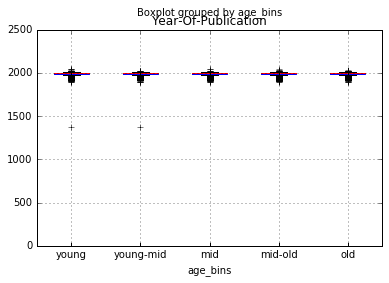

In [107]:
all_dat.boxplot(column='Year-Of-Publication', by='age_bins')

<h3> Note. No effect of age on publication date of reading material.

<h2> Question. Do people of different ages rank the same book differently?</h2>

* Basically, for each book, we want an average of how each age group ranked it (use groupby for that) -- then we need some way to measure how similarly the various groups ranked books ... correlation matrix?


In [115]:
gall_dat = all_dat.groupby(['ISBN','age_bins'])['Book-Rating'].mean()
gall_dat.head(10)

ISBN        age_bins 
0000913154  mid-old      8.0
0001010565  old          0.0
0001046713  young-mid    0.0
0001046934  mid          0.0
0001047663  young        0.0
0001047868  mid          0.0
0001047973  young        9.0
000104799X  old          7.5
0001048082  old          8.0
0001052039  mid          0.0
Name: Book-Rating, dtype: float64

In [117]:
pd.DataFrame(gall_dat).reset_index().head()

,ISBN,age_bins,Book-Rating
0,0000913154,mid-old,8.0
1,0001010565,old,0.0
2,0001046713,young-mid,0.0
3,0001046934,mid,0.0
4,0001047663,young,0.0


In [113]:
pd.DataFrame.pivot??

In [53]:
pivot_df = pd.DataFrame(gall_dat).reset_index().pivot('age_bins',columns='ISBN',values='Book-Rating')
pivot_df.head()

ISBN,0000913154,0001010565,0001046713,0001046934,0001047663,0001047868,0001047973,000104799X,0001048082,0001052039,...,B0001GMSVW,B0001I1JII,B0001PBXMS,B0001PIOX4,B000234N3A,B000234N76,B000234NC6,B00029DGGO,B0002JV9PY,B0002K6K8O
age_bins,,,,,,,,,,,,,,,,,,,,,
young,NaN,NaN,NaN,NaN,0.0,NaN,9.0,NaN,NaN,NaN,...,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0
young-mid,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mid,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,9.0,NaN,0.0,NaN,NaN,NaN
mid-old,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
old,NaN,0.0,NaN,NaN,NaN,NaN,NaN,7.5,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
len(pivot_df.T.dropna()), len(pivot_df.T)

(10985, 227455)

In [126]:
pd.DataFrame.corr??

In [118]:
corr=pivot_df.T.dropna().corr()

corr.reindex(labels)[labels]

age_bins,young,young-mid,mid,mid-old,old
age_bins,,,,,
young,1.000000,0.139824,0.155738,0.148731,0.098719
young-mid,0.139824,1.000000,0.151446,0.133603,0.093372
mid,0.155738,0.151446,1.000000,0.157740,0.099693
mid-old,0.148731,0.133603,0.157740,1.000000,0.121237
old,0.098719,0.093372,0.099693,0.121237,1.000000


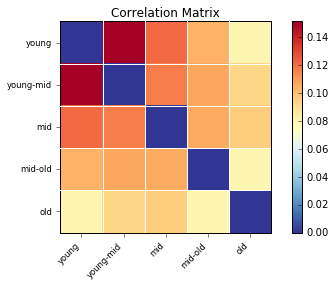

In [62]:
import statsmodels.api as sm

df=np.fill_diagonal(corr.values, 0)
sm.graphics.plot_corr(corr, xnames=labels)
plt.show()


<h3> Note. maybe some age-bin structure in how pairs of bins rank books. 

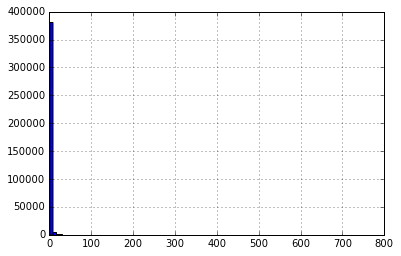

In [152]:
 all_dat.groupby(['ISBN','age_bins'])['Book-Rating'].size().hist(bins=100)

<h3> Question. Maybe different age groups rank the same authors differently? Maybe grouping by author instead of book would give us more interesting results?

In [63]:
gall_dat = all_dat.groupby(['Book-Author','age_bins'])['Book-Rating'].mean()

gall_dat.head()
pivot_df = pd.DataFrame(gall_dat).reset_index().pivot('age_bins',columns='Book-Author',values='Book-Rating')
pivot_df.head()

len(pivot_df.T.dropna()), len(pivot_df.T)

(8126, 86738)

In [64]:
from matplotlib.pyplot import imshow
corr=pivot_df.T.dropna().corr()
corr.reindex(labels)[labels]

age_bins,young,young-mid,mid,mid-old,old
age_bins,,,,,
young,1.000000,0.139824,0.155738,0.148731,0.098719
young-mid,0.139824,1.000000,0.151446,0.133603,0.093372
mid,0.155738,0.151446,1.000000,0.157740,0.099693
mid-old,0.148731,0.133603,0.157740,1.000000,0.121237
old,0.098719,0.093372,0.099693,0.121237,1.000000


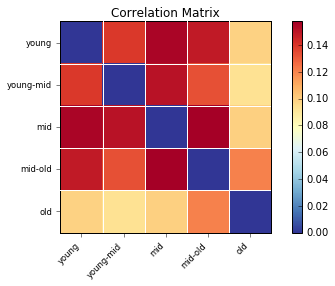

In [65]:
df=np.fill_diagonal(corr.values, 0)
sm.graphics.plot_corr(corr, xnames=labels)
plt.show()

<h3> Question. Another view of the question about whether different age bins view the same books differently: do authors make up different percentages of the reading lists of typical people in each age bin?

In [119]:
all_dat.groupby('Book-Author').size().sort(inplace=False, ascending=False).head()

/Users/thomasj/anaconda/envs/py3k/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


Book-Author
Stephen King          7608
Nora Roberts          6373
John Grisham          4145
James Patterson       4064
Mary Higgins Clark    3337
dtype: int64

In [130]:
float(np.sum([1,2,3]))

6.0

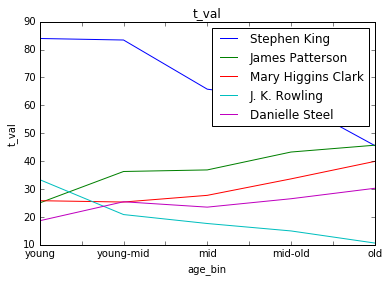

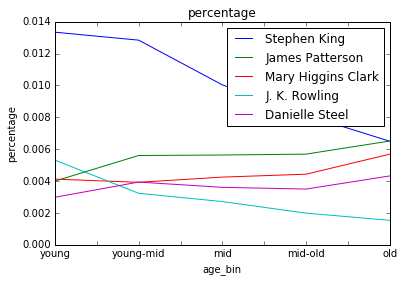

In [158]:

def t_val(val, series):
    """ t-value of val wrt series
    
    Parameters
    ----------
    val : int
    series : `pd.Series` or list of ints
    
    Returns
    -------
    float 
        t-value of input `val` relative to input `series`
    """
    return (val - np.mean(series))/float(np.std(series))


def percentage(val, series):
    """percentage of series represented by val
    
    Parameters
    ----------
    val : int
    series : `pd.Series` or list of ints
    
    Returns
    -------
    float 
        percentage of input `val` represents relative to sum of vals in `series`
    """
    
    return (val / float(np.sum(series)))


def author_ranker(author, rank_function):
    """applies input ranking function for author to all age_bins in df"""
    
    for age_bin, grouped in all_dat.groupby('age_bins'): # iterate on your groups
        sizes=grouped.groupby('Book-Author').size() # run on a new groupby on the grouped items
        yield {'age_bin': age_bin, author:rank_function(sizes[author], sizes)} # generator magic ... you can also just 
                                                                               # list.append
    
    
def author_plotter(author, rank_function):
    """builds a plot for author rank across all age_bins in df
    
    Parameters
    ----------
    author : str
    rank_function : types.FunctionType
    
    Returns
    -------
    matplotlib.axes
        a matplotlib plot
    """
    
    author_rankings = author_ranker(author, rank_function)
    df = pd.DataFrame(author_rankings).set_index('age_bin') # this is great, gives us rank for each author
    df = df.reindex(age_bins) # but age bins are out of order, so re-order
    
    ax = df[author].plot(legend=True) # now plot the author
    plt.title(rank_function.__name__) # add a title by 'looking inside' the function you passed in
    plt.ylabel(rank_function.__name__)
    
    return ax
    
    
    
authors=['Stephen King', 'James Patterson', 'Mary Higgins Clark', 'J. K. Rowling', 'Danielle Steel']
"""list: a set of authors we want to run stats on"""

age_bins = ['young', 'young-mid', 'mid', 'mid-old', 'old']
"""list: the age bins represented in our value datafame"""

if __name__ == '__main__':

    for author in authors:
        author_plotter(author, t_val)

    plt.figure()

    for author in authors:
        author_plotter(author, percentage)
    

In [144]:
plt.figure(figsize=(30,30))
all_dat.groupby('Book-Author').size().sort(inplace=False, ascending=False)

/Users/thomasj/anaconda/envs/py3k/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from IPython.kernel.zmq import kernelapp as app


Book-Author
Stephen King                 7608
Nora Roberts                 6373
John Grisham                 4145
James Patterson              4064
Mary Higgins Clark           3337
Dean R. Koontz               3241
Tom Clancy                   2719
Danielle Steel               2719
Sue Grafton                  2429
Anne Rice                    2382
Janet Evanovich              2368
J. K. Rowling                2242
V.C. Andrews                 2202
Rich Shapero                 2131
Michael Crichton             2105
JOHN GRISHAM                 1960
Nicholas Sparks              1885
Sandra Brown                 1854
R. L. Stine                  1848
Dan Brown                    1772
Agatha Christie              1760
Patricia Daniels Cornwell    1707
Catherine Coulter            1636
Anita Shreve                 1577
Maeve Binchy                 1563
Robin Cook                   1532
Anne McCaffrey               1518
Piers Anthony                1471
Jude Deveraux                1431
Ba

In [137]:
labels

['young', 'young-mid', 'mid', 'mid-old', 'old']